## Plot sigma_DA and sigma_Hz from cases with different spec-z galaxy number density. --04-02-2023

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os, sys
from pathlib import Path
sys.path.append("/home/zjding/csst_bao/fisher_pkmu/")
from mcmc_funs import growth_factor
from astropy.table import Table

In [3]:
speed_c = 299792.458    # speed of light, km/s
Omega_m = 0.3075

survey_area = 17500.0
kmax = 0.3
kwidth = 0.005
zmin = 0.
zmax = 1.6
nzbins = 8
zbins = np.linspace(zmin, zmax, nzbins+1)

const_low = 0.99
const_up = 1.01

skyarea_total = 4*np.pi * (180./np.pi)**2.0
fsky = survey_area/skyarea_total
G_0 = growth_factor(0.0, Omega_m)       # G_0 at z=0, normalization factor 

# ## estimate the power spectrum damping parameter $\Sigma_{specz}$, $\Sigma_{pz}$ from the spec-z and photo-z uncertainty
sigma_specz = 0.002
#sigma_photoz = 0.05
sigma_photoz = 0.025
# Finger-of-God damping term
Sigma_fog = 7.0

fsky_cosmos = 2.0/skyarea_total
fsky_zcosmos = 1.7/skyarea_total

Pspecz_sys = "1.0"

In [4]:
idir0 = "/home/zjding/csst_bao/fisher_pkmu/BAO_part/Fisher_sigma_alphas/numerical_method/default/output/"

In [5]:
recon_dir_list = ["pre_recon", "post_recon"]
text_list = ["Pre-recon", "Post-recon"]
tracer_list = ['photoz', 'specz', 'specz_add_cross', 'specz_photoz_add_cross']
label_list = ['photo-z', 'spec-z', 'spec-z+cross', 'spec-z+cross+photo-z']
line_list = ['--', ':', '-.', '-']
marker_list = ['x', 's', '>', 'o']

f0eff_list = [0.3, 0.5, 0.7]
f0eff_dir_list = ['f0eff0.3/', '', 'f0eff0.7/']

if Sigma_fog > 0.0:
    params_str_list = ['11101010101010', '11110101010101', '11111111111111', '11111111111111']

In [6]:
recon_dir = "pre_recon"

alpha_perp_all = []
alpha_para_all = []

for f0eff, f0eff_dir in zip(f0eff_list, f0eff_dir_list):
    alpha_perp_list = []
    alpha_para_list = []
    for i, tracer in enumerate(tracer_list):
        tracer, params_str = tracer_list[i], params_str_list[i]
        alpha_dir = idir0 + f"sigma_alpha/vary_params_{const_low}_{const_up}/Sigma_fog_{Sigma_fog}/{recon_dir}/k_width{kwidth}/Pspecz_sys{Pspecz_sys}/params_bf1.0/{f0eff_dir}"
        
        filename = "sigma_alpha_{0}_tracer_zerror_specz{1:.3f}_photoz{2:.3f}_kmax{3:.2f}_params{4}.npz".format(tracer, sigma_specz, sigma_photoz, kmax, params_str)

        alpha_dir_temp = alpha_dir
        ifile = Path(alpha_dir, filename)
        data = np.load(ifile)
        alphas_mar = data['alphas_mar']

        alpha_perp_list.append(alphas_mar[:, 2])
        alpha_para_list.append(alphas_mar[:, 3])

    alpha_perp_all.append(alpha_perp_list)
    alpha_para_all.append(alpha_para_list)

In [7]:
alphas_mar

array([[ 0.        ,  0.2       ,  0.04700497,  0.12138634, -0.40424395],
       [ 0.2       ,  0.4       ,  0.01713394,  0.04597904, -0.40260509],
       [ 0.4       ,  0.6       ,  0.01063265,  0.02917675, -0.39621362],
       [ 0.6       ,  0.8       ,  0.00782262,  0.02150213, -0.39285884],
       [ 0.8       ,  1.        ,  0.006664  ,  0.01849599, -0.37906327],
       [ 1.        ,  1.2       ,  0.00740033,  0.02568424, -0.28084639],
       [ 1.2       ,  1.4       ,  0.00803017,  0.06582852, -0.16975011],
       [ 1.4       ,  1.6       ,  0.0080125 ,  0.19997753, -0.2639428 ]])

In [8]:
z_mid = (alphas_mar[:, 0] + alphas_mar[:, 1])/2.0
z_mid

array([0.1, 0.3, 0.5, 0.7, 0.9, 1.1, 1.3, 1.5])

In [9]:
odir = "./figs/z{0:.1f}_{1:.1f}_{2}zbins/".format(zmin, zmax, nzbins)
if not os.path.exists(odir):
    os.makedirs(odir)

## plot the relative difference of the constraints on D_A/r_d

In [10]:
alpha_perp_all[1][1]

array([0.04740668, 0.01741307, 0.01120313, 0.00841107, 0.00770404,
       0.01412131, 0.05046906, 0.2451901 ])

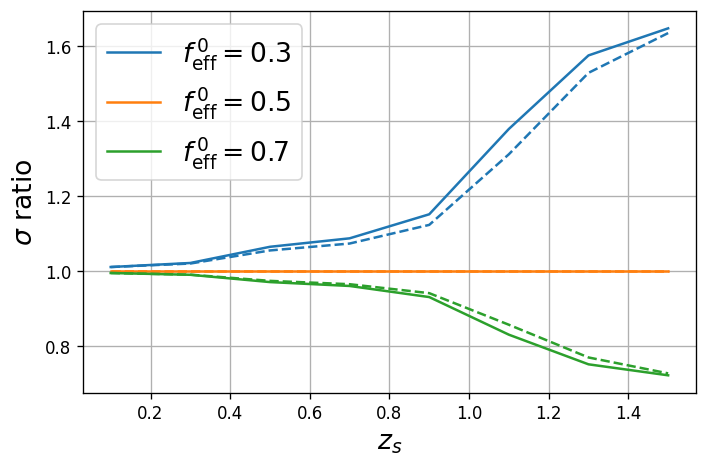

In [11]:
fig, ax = plt.subplots(dpi=120)
for i, f0eff in enumerate(f0eff_list):
    ax.plot(z_mid, alpha_perp_all[i][1]/alpha_perp_all[1][1], color=f'C{i}', label=r"$f_{\mathrm{eff}}^{\,0}=%.1f$"%f0eff_list[i])
    ax.plot(z_mid, alpha_para_all[i][1]/alpha_para_all[1][1], color=f'C{i}', ls='--')

ax.legend(fontsize=16)
ax.grid()
ax.set_xlabel(r"$z_s$", fontsize=16)
ax.set_ylabel(r"$\sigma$ ratio", fontsize=16)
plt.tight_layout()
ofile = odir + "sigma_DA_Hz_ratio_diff_f0eff.png"
plt.savefig(ofile)